In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
W = 10 #window for taking moving average

In [153]:
f = pd.read_csv("MW-timestamp.csv", sep=',', parse_dates=True, infer_datetime_format=True)

In [154]:
f['date'] = pd.to_datetime(f['hpwren_timestamp'], format="%Y-%m-%d %H:%M:%S")
f = f.set_index('date')

In [155]:
#f.plot(y='rain_accumulation')

In [156]:
max (f.rain_duration), max (f.rain_accumulation)

(65530, 603.75999999999999)

In [157]:
f = f.dropna()

In [158]:
del f["min_wind_direction"]
del f["min_wind_speed"]

f.head(1)

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity
date,,,,,,,,,,
2011-09-10 00:00:49,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,341.34,18874,60.5


In [159]:

del f['hpwren_timestamp']

In [160]:
f.head(5)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity
date,,,,,,,,,
2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,341.34,18874,60.5
2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,341.34,18874,39.9
2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,341.34,18874,43.0
2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,341.34,18874,49.5
2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,341.34,18874,58.8


In [161]:
f.shape

(1586824, 9)

# bring down to each integer minute

In [162]:
grouped = f.groupby(pd.TimeGrouper('min'))
f_eachminute = grouped.mean()
f_eachminute.head(5)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity
date,,,,,,,,,
2011-09-10 00:00:00,912.3,64.76,97.0,1.2,106.0,1.6,341.34,18874.0,60.5
2011-09-10 00:01:00,912.3,63.86,161.0,0.8,215.0,1.5,341.34,18874.0,39.9
2011-09-10 00:02:00,912.3,64.22,77.0,0.7,143.0,1.2,341.34,18874.0,43.0
2011-09-10 00:03:00,912.3,64.40,89.0,1.2,112.0,1.6,341.34,18874.0,49.5
2011-09-10 00:04:00,912.3,64.40,185.0,0.4,260.0,1.0,341.34,18874.0,58.8


# Rolling average of each minute

In [163]:
# rolling average of each minute
f_ea_min_w10 = pd.rolling_mean(f_eachminute, window=W, min_periods=None, freq=None, center=True, how=None)

f_ea_min_w10.drop(f_ea_min_w10.head(5).index, inplace=True) # drop first 5 rows
f_ea_min_w10.drop(f_ea_min_w10.tail(4).index, inplace=True) # drop last 4 rows

#f_ea_min_w10.head(2) 
f_ea_min_w10.tail(2) 

/data/home/a1singh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=True,window=10).mean()
  from ipykernel import kernelapp as app


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity
date,,,,,,,,,
2014-09-10 23:54:00,915.9,74.768,110.5,1.53,53.0,1.87,8.69,17920.0,46.07
2014-09-10 23:55:00,915.9,74.732,76.7,1.59,19.5,1.94,8.69,17920.0,46.12


In [164]:
# PER MINUTE 9AM AND 3 PM

# 1
final_9am = f_ea_min_w10.between_time('9:00','9:01', include_start=True, include_end=False)

# 2
final_3pm = f_ea_min_w10.between_time('15:00','15:01', include_start=True, include_end=False)

In [165]:
f_ea_min_w10.shape, final_9am.shape, final_3pm.shape

((1579671, 9), (1097, 9), (1097, 9))

In [166]:
final_9am.columns = [str(col) + '_9am' for col in final_9am.columns]
final_9am.head(2)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
date,,,,,,,,,
2011-09-10 09:00:00,912.56,55.472,139.0,1.4,161.3,1.79,341.34,18874.0,86.27
2011-09-11 09:00:00,916.66,56.336,179.8,1.6,203.2,1.91,341.34,18874.0,77.48


In [167]:
# drop the hh:mm:ss from index (there is already one reading per day)
final_9am = final_9am.groupby(pd.TimeGrouper('D'))
final_9am = final_9am.max()
final_9am.head(2)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
date,,,,,,,,,
2011-09-10,912.56,55.472,139.0,1.4,161.3,1.79,341.34,18874.0,86.27
2011-09-11,916.66,56.336,179.8,1.6,203.2,1.91,341.34,18874.0,77.48


In [168]:
final_3pm.columns = [str(col) + '_3pm' for col in final_3pm.columns]
final_3pm.tail(2)

,air_pressure_3pm,air_temp_3pm,avg_wind_direction_3pm,avg_wind_speed_3pm,max_wind_direction_3pm,max_wind_speed_3pm,rain_accumulation_3pm,rain_duration_3pm,relative_humidity_3pm
date,,,,,,,,,
2014-09-09 15:00:00,915.57,78.800,244.3,3.92,275.3,4.99,8.69,17920.0,51.54
2014-09-10 15:00:00,914.56,81.032,225.2,3.59,241.5,4.66,8.69,17920.0,37.01


In [169]:
# drop the hh:mm:ss from index (there is already one reading per day)
final_3pm = final_3pm.groupby(pd.TimeGrouper('D'))
final_3pm = final_3pm.max()
final_3pm.tail(2)

,air_pressure_3pm,air_temp_3pm,avg_wind_direction_3pm,avg_wind_speed_3pm,max_wind_direction_3pm,max_wind_speed_3pm,rain_accumulation_3pm,rain_duration_3pm,relative_humidity_3pm
date,,,,,,,,,
2014-09-09,915.57,78.800,244.3,3.92,275.3,4.99,8.69,17920.0,51.54
2014-09-10,914.56,81.032,225.2,3.59,241.5,4.66,8.69,17920.0,37.01


In [170]:
# DAILY MIN / MAX

grouped = f.groupby(pd.TimeGrouper('D'))

# 3
f_daily_MAX = grouped.max()
f_daily_MAX.columns = [str(col) + '_DAYMAX' for col in f_daily_MAX.columns]

# 4
f_daily_MIN = grouped.min()
f_daily_MIN.columns = [str(col) + '_DAYMIN' for col in f_daily_MIN.columns]

del f_daily_MIN["avg_wind_direction_DAYMIN"]
del f_daily_MIN["max_wind_direction_DAYMIN"]
del f_daily_MAX["avg_wind_direction_DAYMAX"]
del f_daily_MAX["max_wind_direction_DAYMAX"]

f_daily_MAX.head(1)


,air_pressure_DAYMAX,air_temp_DAYMAX,avg_wind_speed_DAYMAX,max_wind_speed_DAYMAX,rain_accumulation_DAYMAX,rain_duration_DAYMAX,relative_humidity_DAYMAX
date,,,,,,,
2011-09-10,914.9,68.0,8.9,9.3,341.34,18874.0,90.8


In [171]:
f_daily_MAX.shape, f_daily_MIN.shape

((1097, 7), (1097, 7))

In [172]:
f_daily_MAX["rain_duration_DAYMAX"].sum()

20909006.0

In [173]:
f_daily_MIN.shape 

(1097, 7)

In [174]:
final_9am.shape

(1097, 9)

In [175]:
result = pd.concat([f_daily_MAX, f_daily_MIN, final_9am, final_3pm], axis=1)

In [176]:
result.shape

(1097, 32)

In [177]:
f = result.reset_index()
f = f.set_index('date')

del f['rain_accumulation_DAYMAX']
del f['rain_duration_DAYMAX']
del f['rain_accumulation_3pm']
del f['rain_duration_3pm']

f.head()

,air_pressure_DAYMAX,air_temp_DAYMAX,avg_wind_speed_DAYMAX,max_wind_speed_DAYMAX,relative_humidity_DAYMAX,air_pressure_DAYMIN,air_temp_DAYMIN,avg_wind_speed_DAYMIN,max_wind_speed_DAYMIN,rain_accumulation_DAYMIN,...,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,air_pressure_3pm,air_temp_3pm,avg_wind_direction_3pm,avg_wind_speed_3pm,max_wind_direction_3pm,max_wind_speed_3pm,relative_humidity_3pm
date,,,,,,,,,,,,,,,,,,,,,
2011-09-10,914.9,68.00,8.9,9.3,90.8,911.1,52.70,0.1,0.2,341.34,...,341.34,18874.0,86.27,913.05,61.394,211.9,5.83,219.0,6.92,69.90
2011-09-11,918.2,71.60,6.1,7.1,91.2,914.5,51.98,0.1,0.1,341.34,...,341.34,18874.0,77.48,916.50,70.250,233.7,2.49,252.8,3.23,49.09
2011-09-12,920.2,78.62,7.2,8.3,48.1,917.8,65.84,0.1,0.2,341.34,...,341.34,18874.0,18.76,918.79,76.082,217.6,3.95,228.0,4.64,33.22
2011-09-13,919.6,77.54,7.7,8.2,63.9,917.5,66.74,0.1,0.2,341.34,...,341.34,18874.0,41.95,918.07,70.376,202.3,4.05,211.9,4.71,59.69
2011-09-14,917.6,73.58,5.8,6.5,67.0,914.2,64.40,0.1,0.2,341.34,...,341.34,18874.0,49.01,915.31,71.852,307.0,1.32,223.8,1.95,52.97


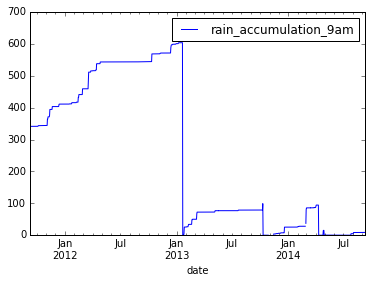

In [178]:
f.plot(y='rain_accumulation_9am')
f = f.dropna()

f["rainaccumulation"] = f["rain_accumulation_9am"] - f["rain_accumulation_9am"].shift(1)
f["rainduration"] = f["rain_duration_9am"] - f["rain_duration_9am"].shift(1)

f["rain_duration_9am"] = (f["rainduration"] + 65535.0 )%65535.0
f["rain_accumulation_9am"] = (f["rainaccumulation"] + 655.35)%655.35

del f["rainaccumulation"]
del f["rainduration"]
f = f.dropna()

In [179]:
f = f[f['rain_accumulation_9am'] < 50]
f.shape

(1068, 28)

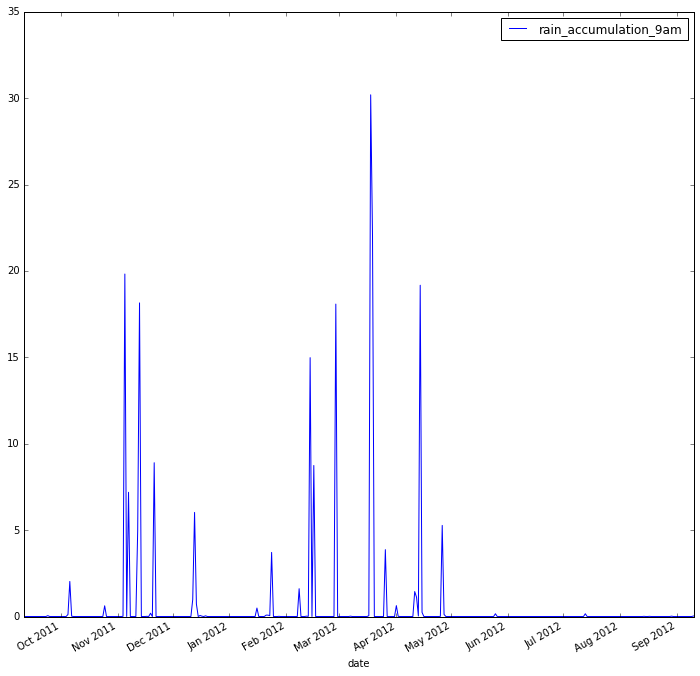

In [180]:
f[f['rain_accumulation_9am'] < 50].head(365).plot(y='rain_accumulation_9am', figsize=(12,12))

In [181]:
f.to_csv("daily_weather_raw.csv")